In [1]:
%%time
# For MD
import plumed
import MDAnalysis as mda
import mdtraj as md
import dpdata
from ase.io import read, write
from ase import Atom,Atoms
from ase.visualize import view
# For Math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import scipy
# Fot System
import os
import sys
import subprocess
import glob
!pwd

/home/jxhe/works/dp-cnt/cnt-dpmd-data/work_plat
CPU times: user 3.13 s, sys: 1.93 s, total: 5.06 s
Wall time: 15.4 s


In [2]:
!ls '/home/jxhe/works/dp-cnt/cnt-dpmd-data/6-6-6-300'

2500.pdb		  cnt.ndx	make_ndx_all.py		 POSCAR
2d_density_pb.py	  CNT.top	md.mdp			 POSCAR.pdb
2d_density.py		  #CNT.top.1#	mdout.mdp		 t
2d_plot.py		  #CNT.top.2#	mkndx_cnt.py		 test.ndx
6-6-6-300.gro		  cnt.tpr	msd_c.xvg		 topol.top
6-6-6-300-lmp-amber.data  conf.data	nopbc.xtc		 #topol.top.1#
6-6-6-300.pdb		  dp2gmxtrj.py	#nopbc.xtc.1#		 #topol.top.2#
6-6-6-300.xtc		  file.xvg	nvt.lammpstrj		 #topol.top.3#
charmm36-jul2022.ff	  group.index	outtpr.txt		 #topol.top.4#
charmm36.zip		  h.ndx		pdb2lammps_amber_all.py  topo.sh
check.log		  in_cnt.py	pdb2lammps_amber.py	 water.ndx
CNT.itp			  index.ndx	plot_xvg.py		 x2top.log


In [3]:
data_path='/home/jxhe/works/dp-cnt/cnt-dpmd-data/6-6-6-300'
outdir = '/home/jxhe/works/dp-cnt/cnt-dpmd-data/work_plat'
scriptdir ='/home/jxhe/works/dp-cnt/cnt-dpmd-data/scripts/'
if not os.path.exists(outdir):
    os.makedirs(outdir)
print("outdir:", outdir)
print("datadir:",data_path)

os.chdir(outdir)
# and check with bash command pwd - note the exclamation mark at the beginning
!pwd

outdir: /home/jxhe/works/dp-cnt/cnt-dpmd-data/work_plat
datadir: /home/jxhe/works/dp-cnt/cnt-dpmd-data/6-6-6-300
/home/jxhe/works/dp-cnt/cnt-dpmd-data/work_plat


In [48]:
trjtpr=data_path+ "/cnt.tpr"
trjxtc=data_path+ "/6-6-6-300.xtc"
u = mda.Universe(trjtpr,trjxtc)
total_frames = len(u.trajectory)
# 遍历每一帧
for ts in u.trajectory[9:20:2]:
    # 获取盒子信息
    box = ts.dimensions
for atom in u.atoms:
    print(atom)
    print("Frame:", ts.frame, "Box dimensions:", box[0], box[1], box[2], box[3], box[4], box[5])
print(f"Total frames in the trajectory: {total_frames}")

<Atom 1: C of type CA of resname CNT, resid 1 and segid seg_0_CNT_in_Water>
Frame: 0 Box dimensions: 39.179504 39.130848 44.758907 90.0 90.0 90.0
<Atom 2: C of type CA of resname CNT, resid 1 and segid seg_0_CNT_in_Water>
Frame: 0 Box dimensions: 39.179504 39.130848 44.758907 90.0 90.0 90.0
<Atom 3: C of type CA of resname CNT, resid 1 and segid seg_0_CNT_in_Water>
Frame: 0 Box dimensions: 39.179504 39.130848 44.758907 90.0 90.0 90.0
<Atom 4: C of type CA of resname CNT, resid 1 and segid seg_0_CNT_in_Water>
Frame: 0 Box dimensions: 39.179504 39.130848 44.758907 90.0 90.0 90.0
<Atom 5: C of type CA of resname CNT, resid 1 and segid seg_0_CNT_in_Water>
Frame: 0 Box dimensions: 39.179504 39.130848 44.758907 90.0 90.0 90.0
<Atom 6: C of type CA of resname CNT, resid 1 and segid seg_0_CNT_in_Water>
Frame: 0 Box dimensions: 39.179504 39.130848 44.758907 90.0 90.0 90.0
<Atom 7: C of type CA of resname CNT, resid 1 and segid seg_0_CNT_in_Water>
Frame: 0 Box dimensions: 39.179504 39.130848 44.

[39.179504 39.130848 44.758907 90.       90.       90.      ]
19.589752197265625
19.5654239654541
(19.589752197265625, 19.5654239654541, 22.08916664123535)
14.268334
Data saved to in_count.dat
[8, 7, 7, 7, 7, 6, 7, 7, 6, 6, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 7, 7, 7, 8, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 6, 8, 7, 8, 7, 7, 7, 7, 6, 7, 6, 6, 6, 6, 7, 7, 7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 8, 7, 7, 8, 7, 8, 8, 7, 7, 7, 7, 7, 8, 8, 7, 6, 6, 6, 6, 6, 6, 7, 8, 8, 7, 7, 6, 7, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 6, 8, 6, 6, 7, 7, 7, 7, 6, 7, 6, 7, 6, 7, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 7, 6, 7, 7, 7, 7, 8, 7, 6, 7, 7, 7, 7, 7, 6, 6, 6, 7, 8, 7, 7, 6, 6, 6, 6, 7, 7, 6, 6, 6, 7, 7, 7, 8, 8, 8, 7, 8,

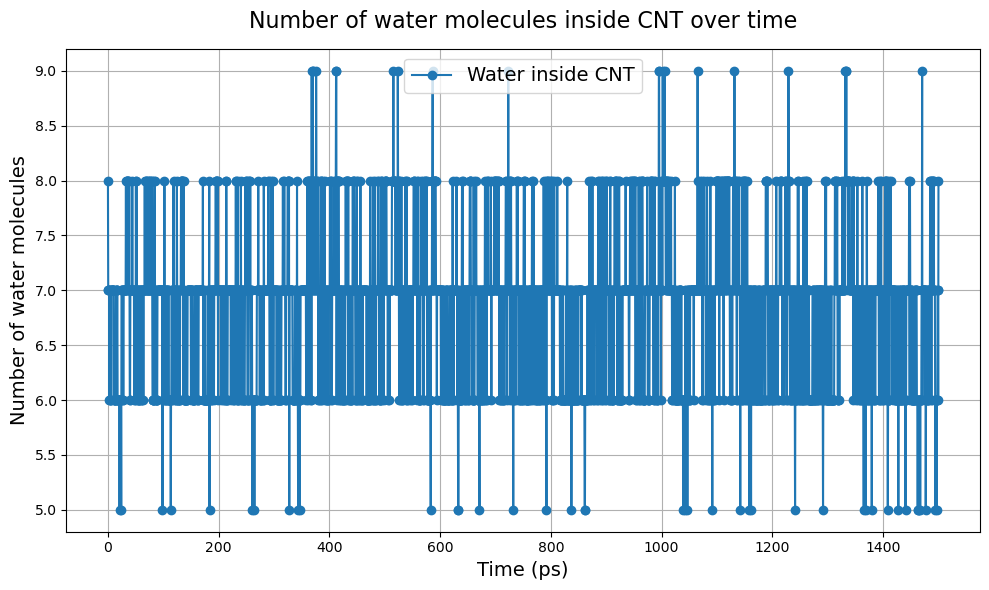

In [18]:
# box region
water_HT = u.select_atoms('type HT')
water_OT = u.select_atoms('type OT')
cnt_c_atoms = u.select_atoms('resname CNT and name C')
cnt_h_atoms = u.select_atoms('resname CNT and name H')
z_mean = cnt_c_atoms.positions[:,2].mean()
cnt_up_h_atoms = u.select_atoms(f'resname CNT and name H and prop z > {z_mean}')
cnt_down_h_atoms= u.select_atoms(f'resname CNT and name H and prop z <= {z_mean}')
z_mean_up = cnt_up_h_atoms.positions[:,2].mean()
z_mean_down = cnt_down_h_atoms.positions[:,2].mean()
z_center=(z_mean_up+z_mean_down)/2
cnt_length = z_mean_up - z_mean_down
region_selected_OT = water_OT.select_atoms(f'prop z > {z_mean_down} and prop z < {z_mean_up}')
region_selected_HT = water_HT.select_atoms(f'prop z > {z_mean_down} and prop z < {z_mean_up}')
box_all = u.dimensions
x_center = box[0] / 2
y_center = box[1] / 2
print(box_all)
print(x_center)
print(y_center)
cylinder_radius = 6  # in Angstrom
cylinder_center = (x_center, y_center, z_center)
cylinder_height = cnt_length
print(cylinder_center)
print(cylinder_height)
water_inside_cylinder_per_frame = []

for ts in u.trajectory:
    # 使用cyzone选择圆柱区域内的水氧原子
    water_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cylinder_height/2} {-cylinder_height/2} resname CNT")
    
    water_inside_cylinder_per_frame.append(water_inside_cylinder.n_atoms)
import csv

# 文件名
filename = "in_count.dat"

# 保存数据到CSV文件
with open(filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # 写入标题行
    csvwriter.writerow(["frame", "water_inside_cylinder_per_frame"])
    
    # 写入数据
    for i, count in enumerate(water_inside_cylinder_per_frame):
        csvwriter.writerow([i, count])

print(f"Data saved to {filename}")
print(water_inside_cylinder_per_frame)
# 计算时间
time_step = 0.5  # in ps
times = [i * time_step for i in range(len(water_inside_cylinder_per_frame))]

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(times, water_inside_cylinder_per_frame, '-o', label='Water inside CNT')
plt.xlabel('Time (ps)',fontsize=14)
plt.ylabel('Number of water molecules',fontsize=14)
plt.title('Number of water molecules inside CNT over time',fontsize=16,pad=15)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
#cnt cog angle and water
import MDAnalysis as mda
from MDAnalysis.lib.distances import calc_angles
import numpy as np
import csv
import pandas as pd

# Assuming you've defined your Universe 'u' and other parameters before this
# u = mda.Universe('your_topology_file', 'your_trajectory_file')  # Replace with your actual file names

# Define the CNT atoms
cnt_c_atoms = u.select_atoms('resname CNT and name C')

# Calculate the mean z-coordinate for the CNT atoms
z_mean = cnt_c_atoms.positions[:,2].mean()
cnt_up_h_atoms = u.select_atoms(f'resname CNT and name H and prop z > {z_mean}')
cnt_down_h_atoms= u.select_atoms(f'resname CNT and name H and prop z <= {z_mean}')
z_mean_up = cnt_up_h_atoms.positions[:,2].mean()
z_mean_down = cnt_down_h_atoms.positions[:,2].mean()
cnt_length = z_mean_up - z_mean_down-1.2

cylinder_radius = 6  # Assuming a default value, replace if needed

# Counter for the custom residue names
sin_counter = 1

# Dictionary to track known water molecules and their residue names
known_water_molecules = {}

# Prepare the CSV file for writing
with open("water_in_CNT.csv", 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write the header
    csvwriter.writerow(["frame", "num_of_ow_in_CNT", "ow_hw_pairs", "ow_hw_pairs_resname"])

    # DataFrame to store angles
    angles_df = pd.DataFrame(columns=["resname", "frame", "angle"])
    count_df=pd.DataFrame(columns=["frame","num_of_ow_in_CNT"])
    # Iterate over each frame in the trajectory from 10th to 20th frame
    for ts in u.trajectory[0:20]:
        # Select water oxygen atoms inside the CNT for the current frame
        ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")
        ow_hw_pairs = []
        new_resnames = []
        count_df=count_df.append({"frame": ts.frame, "num_of_ow_in_CNT":ow_inside_cylinder.n_atoms}, ignore_index=True)
        for oxygen in ow_inside_cylinder:
            near_h_sel = u.select_atoms(f"type HT and around 1.1 index {oxygen.index}")
            if len(near_h_sel) == 2:
                hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
                ow_hw_pair = [oxygen.index] + hw_indices_pair
                ow_hw_pairs.append(ow_hw_pair)

                # Check if the water molecule is already known
                if tuple(ow_hw_pair) in known_water_molecules:
                    new_resname = known_water_molecules[tuple(ow_hw_pair)]
                else:
                    # Generate the new residue name
                    new_resname = f"SIN{sin_counter:02d}"
                    known_water_molecules[tuple(ow_hw_pair)] = new_resname
                    sin_counter += 1

                new_resnames.append(new_resname)

                # Set the custom residue name for the oxygen atom and its bonded hydrogens
                for atom_index in ow_hw_pair:
                    u.atoms[atom_index].residue.resname = new_resname

                # 计算水分子的键角
                angle_rad = calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
                angle_deg = np.rad2deg(angle_rad)
                
                # Append to the DataFrame
                angles_df = angles_df.append({"resname": new_resname, "frame": ts.frame, "angle": angle_deg}, ignore_index=True)

        # Write the data for the current frame to the CSV file
        csvwriter.writerow([ts.frame, ow_inside_cylinder.n_atoms, ow_hw_pairs, new_resnames])

# Save angles to a separate CSV
angles_df.to_csv("angles_data.csv", index=False)
count_df.to_csv("in_cnt.csv", index=False)
# angles_df
# count_df

/tmp/ipykernel_63380/2508301343.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df=count_df.append({"frame": ts.frame, "num_of_ow_in_CNT":ow_inside_cylinder.n_atoms}, ignore_index=True)
/tmp/ipykernel_63380/2508301343.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  angles_df = angles_df.append({"resname": new_resname, "frame": ts.frame, "angle": angle_deg}, ignore_index=True)
/tmp/ipykernel_63380/2508301343.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  angles_df = angles_df.append({"resname": new_resname, "frame": ts.frame, "angle": angle_deg}, ignore_index=True)
/tmp/ipykernel_63380/2508301343.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

/tmp/ipykernel_63380/2508301343.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  angles_df = angles_df.append({"resname": new_resname, "frame": ts.frame, "angle": angle_deg}, ignore_index=True)
/tmp/ipykernel_63380/2508301343.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  angles_df = angles_df.append({"resname": new_resname, "frame": ts.frame, "angle": angle_deg}, ignore_index=True)
/tmp/ipykernel_63380/2508301343.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  angles_df = angles_df.append({"resname": new_resname, "frame": ts.frame, "angle": angle_deg}, ignore_index=True)
/tmp/ipykernel_63380/2508301343.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [56]:
import MDAnalysis as mda
import pandas as pd

# 假设u是你的宇宙对象
# u = mda.Universe(你的文件路径)

oxygens = u.select_atoms("type OT")
water_pairs = []

for oxygen in oxygens:
    near_h_sel = u.select_atoms(f"type HT and around 1.1 index {oxygen.index}")
    if len(near_h_sel) == 2:
        hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
        ow_hw_pair = [oxygen.index] + hw_indices_pair
        water_pairs.append(ow_hw_pair)

# 创建DataFrame
index = [f"SOL{i+1}" for i in range(len(water_pairs))]
columns = ["Oxygen Index", "Hydrogen1 Index", "Hydrogen2 Index"]
df = pd.DataFrame(water_pairs, index=index, columns=columns)

# 保存到CSV文件
df.to_csv('water_index.csv', index_label="Water Molecule")

print(f"找到了 {len(water_pairs)} 个水分子。")
print("水分子的索引已保存到water_index.csv文件中。")
df

找到了 1951 个水分子。
水分子的索引已保存到water_index.csv文件中。


,Oxygen Index,Hydrogen1 Index,Hydrogen2 Index
SOL1,132,2107,2108
SOL2,133,2109,2110
SOL3,134,2111,2112
SOL4,135,2113,2114
SOL5,136,2115,2116
...,...,...,...
SOL1947,2078,5999,6000
SOL1948,2079,6001,6002
SOL1949,2080,6003,6004
SOL1950,2081,6005,6006


In [63]:
import MDAnalysis as mda
import pandas as pd
from MDAnalysis.lib import distances
import numpy as np

# 假设u是你的宇宙对象
# u = mda.Universe(你的文件路径)

oxygens = u.select_atoms("type OT")
water_data = []

for oxygen in oxygens:
    near_h_sel = u.select_atoms(f"type HT and around 1.1 index {oxygen.index}")
    if len(near_h_sel) == 2:
        hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
        
        # 计算键长
        OH1_length = distances.calc_bonds(oxygen.position, near_h_sel[0].position)
        OH2_length = distances.calc_bonds(oxygen.position, near_h_sel[1].position)
        
        # 计算键角 HT1-OT-HT2，并转换为度
        angle_rad = distances.calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
        angle_deg = np.degrees(angle_rad)
        
        ow_hw_data = [oxygen.index] + hw_indices_pair + [angle_deg, OH1_length, OH2_length]
        water_data.append(ow_hw_data)

# 创建DataFrame
index = [f"SOL{i+1}" for i in range(len(water_data))]
columns = ["OT", "HT1", "HT2", "Angle", "OH1", "OH2"]
df = pd.DataFrame(water_data, index=index, columns=columns)

# 保存到CSV文件
df.to_csv('all_water_info.csv', index_label="Water Molecule")

print(f"找到了 {len(water_data)} 个水分子。")
print("水分子的索引和键长、键角数据已保存到all_water_info.csv文件中。")
df

找到了 1951 个水分子。
水分子的索引和键长、键角数据已保存到all_water_info.csv文件中。


,OT,HT1,HT2,Angle,OH1,OH2
SOL1,132,2107,2108,107.131582,1.005187,0.997646
SOL2,133,2109,2110,105.454975,1.003693,0.951526
SOL3,134,2111,2112,104.576869,1.003096,0.962135
SOL4,135,2113,2114,104.555543,0.953624,0.961768
SOL5,136,2115,2116,111.826587,0.960263,0.996291
...,...,...,...,...,...,...
SOL1947,2078,5999,6000,98.903067,0.976370,0.982753
SOL1948,2079,6001,6002,114.141781,0.989393,0.948947
SOL1949,2080,6003,6004,104.674273,0.964366,0.978316
SOL1950,2081,6005,6006,109.664073,0.982701,38.272542


In [62]:
import MDAnalysis as mda
import pandas as pd
from MDAnalysis.lib import distances
import numpy as np

# 假设u是你的宇宙对象
# u = mda.Universe(你的文件路径)

# CNT键统计
cnt_c_atoms = u.select_atoms("resname CNT and type CA")
cnt_h_atoms = u.select_atoms("resname CNT and type HP")
oxygens = u.select_atoms("type OT")

cc_bond_count = 0
ch_bond_count = 0
ht_ot_bond_count = 0

for c_atom in cnt_c_atoms:
    near_c_atoms = u.select_atoms(f"(type CA and around 1.6 index {c_atom.index}) and not index {c_atom.index}")
    cc_bond_count += len(near_c_atoms)
    near_h_atoms = u.select_atoms(f"type HP and around 1.3 index {c_atom.index}")
    ch_bond_count += len(near_h_atoms)

cc_bond_count //= 2

# 水分子键统计和键长、键角计算
water_data = []
for oxygen in oxygens:
    near_h_sel = u.select_atoms(f"type HT and around 1.1 index {oxygen.index}")
    if len(near_h_sel) == 2:
        ht_ot_bond_count += 2
        hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
        OH1_length = distances.calc_bonds(oxygen.position, near_h_sel[0].position)
        OH2_length = distances.calc_bonds(oxygen.position, near_h_sel[1].position)
        angle_rad = distances.calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
        angle_deg = np.degrees(angle_rad)
        ow_hw_data = [oxygen.index] + hw_indices_pair + [angle_deg, OH1_length, OH2_length]
        water_data.append(ow_hw_data)

# 创建DataFrame
index = [f"SOL{i+1}" for i in range(len(water_data))]
columns = ["OT", "HT1", "HT2", "Angle", "OH1", "OH2"]
df = pd.DataFrame(water_data, index=index, columns=columns)

# 保存到CSV文件
df.to_csv('water_mass.csv', index_label="Water Molecule")

cnt_bond_count = cc_bond_count + ch_bond_count
all_bond_count = cc_bond_count + ch_bond_count + ht_ot_bond_count

print(f"CNT中的C-C成键数目为：{cc_bond_count}")
print(f"CNT中的C-H成键数目为：{ch_bond_count}")
print(f"CNT中原子成键总数目为：{cnt_bond_count}")
print(f"水分子中的HT-OT成键数目为：{ht_ot_bond_count}")
print(f"体系中原子成键总数目为：{all_bond_count}")
print(f"找到了 {len(water_data)} 个水分子。")
print("水分子的索引和键长、键角数据已保存到water_mass.csv文件中。")
df

CNT中的C-C成键数目为：186
CNT中的C-H成键数目为：24
CNT中原子成键总数目为：210
水分子中的HT-OT成键数目为：3902
体系中原子成键总数目为：4112
找到了 1951 个水分子。
水分子的索引和键长、键角数据已保存到water_mass.csv文件中。


,OT,HT1,HT2,Angle,OH1,OH2
SOL1,132,2107,2108,107.131582,1.005187,0.997646
SOL2,133,2109,2110,105.454975,1.003693,0.951526
SOL3,134,2111,2112,104.576869,1.003096,0.962135
SOL4,135,2113,2114,104.555543,0.953624,0.961768
SOL5,136,2115,2116,111.826587,0.960263,0.996291
...,...,...,...,...,...,...
SOL1947,2078,5999,6000,98.903067,0.976370,0.982753
SOL1948,2079,6001,6002,114.141781,0.989393,0.948947
SOL1949,2080,6003,6004,104.674273,0.964366,0.978316
SOL1950,2081,6005,6006,109.664073,0.982701,38.272542


In [64]:
import MDAnalysis as mda
import pandas as pd
from MDAnalysis.lib import distances
import numpy as np

# 假设u是你的宇宙对象
# u = mda.Universe(你的文件路径)

# CNT键统计
cnt_c_atoms = u.select_atoms("resname CNT and type CA")
cnt_h_atoms = u.select_atoms("resname CNT and type HP")
oxygens = u.select_atoms("type OT")

cc_bond_count = 0
ch_bond_count = 0
ht_ot_bond_count = 0

cc_bond_indices = set()
ch_bond_indices = set()
ht_ot_bond_indices = set()

for c_atom in cnt_c_atoms:
    near_c_atoms = u.select_atoms(f"(type CA and around 1.6 index {c_atom.index}) and not index {c_atom.index}")
    for near_c in near_c_atoms:
        pair = tuple(sorted([c_atom.index, near_c.index]))
        if pair not in cc_bond_indices:
            cc_bond_indices.add(pair)
            cc_bond_count += 1

    near_h_atoms = u.select_atoms(f"type HP and around 1.3 index {c_atom.index}")
    for near_h in near_h_atoms:
        pair = (c_atom.index, near_h.index)
        if pair not in ch_bond_indices:
            ch_bond_indices.add(pair)
            ch_bond_count += 1

# 水分子键统计和键长、键角计算
water_data = []
for oxygen in oxygens:
    near_h_sel = u.select_atoms(f"type HT and around 1.1 index {oxygen.index}")
    if len(near_h_sel) == 2:
        for near_h in near_h_sel:
            pair = (oxygen.index, near_h.index)
            if pair not in ht_ot_bond_indices:
                ht_ot_bond_indices.add(pair)
                ht_ot_bond_count += 1

        OH1_length = distances.calc_bonds(oxygen.position, near_h_sel[0].position)
        OH2_length = distances.calc_bonds(oxygen.position, near_h_sel[1].position)
        angle_rad = distances.calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
        angle_deg = np.degrees(angle_rad)
        ow_hw_data = [oxygen.index] + [near_h_sel[0].index, near_h_sel[1].index] + [angle_deg, OH1_length, OH2_length]
        water_data.append(ow_hw_data)

# 创建DataFrame
index = [f"SOL{i+1}" for i in range(len(water_data))]
columns = ["OT", "HT1", "HT2", "Angle", "OH1", "OH2"]
df_water = pd.DataFrame(water_data, index=index, columns=columns)

# 保存到CSV文件
df_water.to_csv('water_all.csv', index_label="Water Molecule")

# 保存成键对索引到CSV文件
bond_data = list(cc_bond_indices) + list(ch_bond_indices) + list(ht_ot_bond_indices)
df_bonds = pd.DataFrame(bond_data, columns=["Atom1", "Atom2"])
df_bonds.to_csv('bond_indices.csv', index=False)

print(f"CNT中的C-C成键数目为：{cc_bond_count}")
print(f"CNT中的C-H成键数目为：{ch_bond_count}")
print(f"水分子中的HT-OT成键数目为：{ht_ot_bond_count}")
print(f"找到了 {len(water_data)} 个水分子。")
print("水分子的索引和键长、键角数据已保存到water_index.csv文件中。")
print("成键对索引已保存到bond_indices.csv文件中。")


CNT中的C-C成键数目为：186
CNT中的C-H成键数目为：24
水分子中的HT-OT成键数目为：3902
找到了 1951 个水分子。
水分子的索引和键长、键角数据已保存到water_index.csv文件中。
成键对索引已保存到bond_indices.csv文件中。


# Final 可用

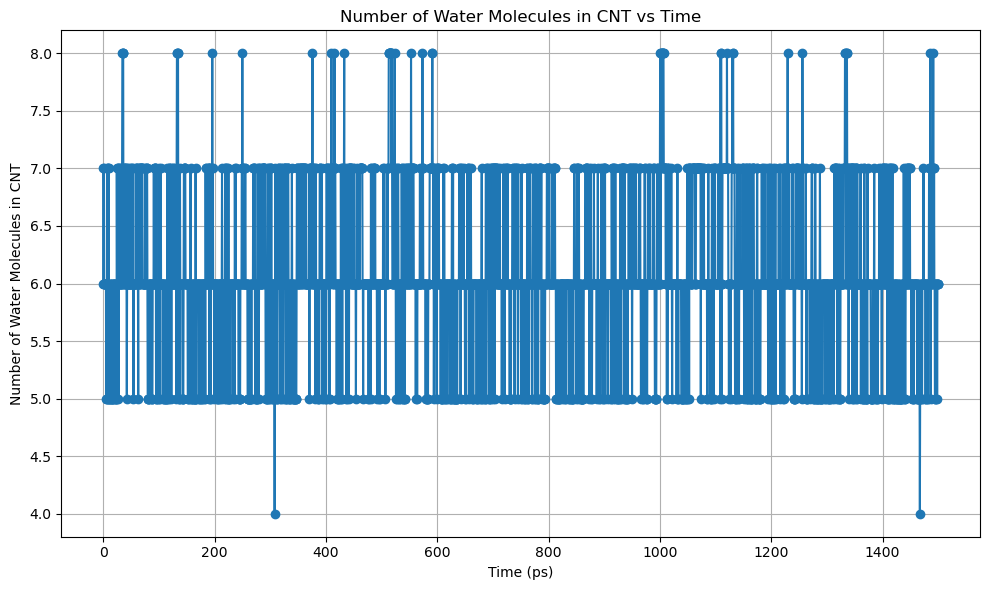

水分子的索引和键长、键角数据已保存到water_index.csv文件中。
成键对索引已保存到bond_indices.csv文件中。
每一帧中CNT内的水分子数据已保存到water_inside_CNT_per_frame.csv文件中。
每一帧中CNT内的水分子数量已保存到in_water_count.csv文件中。


In [68]:
import MDAnalysis as mda
import pandas as pd
from MDAnalysis.lib import distances
import numpy as np
import matplotlib.pyplot as plt


# Define the CNT atoms
cnt_c_atoms = u.select_atoms('resname CNT and name C')

# Calculate the mean z-coordinate for the CNT atoms
z_mean = cnt_c_atoms.positions[:,2].mean()
cnt_up_h_atoms = u.select_atoms(f'resname CNT and name H and prop z > {z_mean}')
cnt_down_h_atoms= u.select_atoms(f'resname CNT and name H and prop z <= {z_mean}')
z_mean_up = cnt_up_h_atoms.positions[:,2].mean()
z_mean_down = cnt_down_h_atoms.positions[:,2].mean()
cnt_length = z_mean_up - z_mean_down-1.2

cylinder_radius = 6  # Assuming a default value

# 定义一个函数来获取CNT内的水分子
def get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length):
    ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")
    water_molecules = []
    for oxygen in ow_inside_cylinder:
        if oxygen.index in df_water["OT"].values:
            water_info = df_water[df_water["OT"] == oxygen.index].iloc[0].tolist()
            # 获取每个原子的三维坐标
            ot_coords = oxygen.position.tolist()
            ht1_coords = u.atoms[int(water_info[1])].position.tolist()
            ht2_coords = u.atoms[int(water_info[2])].position.tolist()
            # 将三维坐标添加到水分子信息中
            water_info.extend([ot_coords, ht1_coords, ht2_coords])
            water_molecules.append(water_info)
    return water_molecules

# 初始化一个列表来保存所有帧的数据
all_frames_data = []
water_count_per_frame = []

# 迭代轨迹的每一帧
for ts in u.trajectory:
    frame_data = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
    for water_info in frame_data:
        all_frames_data.append([ts.frame] + water_info)
    water_count_per_frame.append([ts.frame, len(frame_data)])

# 将数据转换为DataFrame
columns = ["Frame", "OT", "HT1", "HT2", "Angle", "OH1", "OH2", "OT_Coords", "HT1_Coords", "HT2_Coords"]
df_all_frames = pd.DataFrame(all_frames_data, columns=columns)
df_water_count = pd.DataFrame(water_count_per_frame, columns=["Frame", "Number of Water Molecules"])

# 保存到CSV文件
df_water.to_csv('water_index.csv', index_label="Water Molecule")
df_bonds.to_csv('bond_indices.csv', index=False)
df_all_frames.to_csv('water_inside_CNT_per_frame.csv', index=False)
df_water_count.to_csv('in_water_count.csv', index=False)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(df_water_count["Frame"] * 0.5, df_water_count["Number of Water Molecules"], marker='o', linestyle='-')
plt.xlabel('Time (ps)')
plt.ylabel('Number of Water Molecules in CNT')
plt.title('Number of Water Molecules in CNT vs Time')
plt.grid(True)
plt.tight_layout()
plt.savefig('water_count_vs_time.png')
plt.show()

print("水分子的索引和键长、键角数据已保存到water_index.csv文件中。")
print("成键对索引已保存到bond_indices.csv文件中。")
print("每一帧中CNT内的水分子数据已保存到water_inside_CNT_per_frame.csv文件中。")
print("每一帧中CNT内的水分子数量已保存到in_water_count.csv文件中。")

## bisecZ

In [70]:
def calculate_bisector_angle(oxygen, h1, h2):
    # 计算角平分线
    bisector = (h1.position + h2.position) / 2 - oxygen.position
    bisector /= np.linalg.norm(bisector)  # Normalize

    # z轴正方向
    z_axis = np.array([0, 0, 1])

    # 计算夹角
    cos_angle = np.dot(bisector, z_axis)
    angle_rad = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)
    return angle_deg

In [71]:
# ... [之前的代码]

# 初始化输出数据列表
output_data = []

# 迭代轨迹的每一帧
for ts in u.trajectory:
    frame_data = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
    angles = []
    for water_info in frame_data:
        oxygen = u.atoms[int(water_info[0])]
        h1 = u.atoms[int(water_info[1])]
        h2 = u.atoms[int(water_info[2])]
        angle = calculate_bisector_angle(oxygen, h1, h2)
        angles.append(angle)
    mean_angle = np.mean(angles) if angles else 0
    # 填充angles列表，以确保其长度与最大水分子数量匹配
    while len(angles) < max_water_in_frame:
        angles.append(None)
    output_data.append([ts.frame, len(frame_data)] + angles + [mean_angle])

# 将数据转换为DataFrame
columns = ["Frame", "Number_in_CNT"] + [f"bsecz{i+1}" for i in range(max_water_in_frame)] + ["bsecz_mean"]
df_output = pd.DataFrame(output_data, columns=columns)

# 保存到CSV文件
df_output.to_csv('bisector_angles.csv', index=False)

print("每一帧中CNT内的水分子角平分线与z轴正方向的夹角数据已保存到bisector_angles.csv文件中。")


NameError: name 'max_water_in_frame' is not defined

In [109]:
df_output

,Frame,Number_in_CNT,bsecz1,bsecz2,bsecz3,bsecz4,bsecz5,bsecz6,bsecz7,bsecz8,bsecz9,bsecz_mean
0,0,7,49.521119,50.312852,13.139977,25.058090,37.362000,54.658794,32.435668,NaN,None,37.498357
1,1,6,73.816348,46.412939,12.673328,12.604403,70.643967,41.026836,NaN,NaN,None,42.862970
2,2,6,27.651399,35.921954,12.966483,34.113850,64.278064,42.435804,NaN,NaN,None,36.227926
3,3,7,46.072401,20.918442,9.408282,36.029417,92.730074,60.073565,74.011720,NaN,None,48.463414
4,4,6,48.631165,42.655867,24.270993,34.442027,65.159430,61.408916,NaN,NaN,None,46.094733
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2996,5,115.921598,149.261003,171.335803,172.735258,122.477045,NaN,NaN,NaN,None,146.346141
2997,2997,6,142.560778,131.294261,156.525073,102.844621,134.388893,97.164321,NaN,NaN,None,127.462991
2998,2998,6,133.389878,152.758253,116.153595,111.134011,120.145741,87.650028,NaN,NaN,None,120.205251
2999,2999,6,117.990794,167.951729,135.040911,144.842273,130.124483,77.108227,NaN,NaN,None,128.843069


In [72]:
import MDAnalysis as mda
import pandas as pd
import numpy as np

# 假设u是你的宇宙对象
# u = mda.Universe(你的文件路径)

# ... [你之前的代码，包括定义的函数和变量]

def calculate_bisector_angle(oxygen, h1, h2):
    # 计算角平分线
    bisector = (h1.position + h2.position) / 2 - oxygen.position
    bisector /= np.linalg.norm(bisector)  # Normalize

    # z轴正方向
    z_axis = np.array([0, 0, 1])

    # 计算夹角
    cos_angle = np.dot(bisector, z_axis)
    angle_rad = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)
    return angle_deg

# 初始化输出数据列表
output_data = []

# 迭代轨迹的每一帧
for ts in u.trajectory:
    frame_data = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
    angles = []
    same_orientation_count = 0
    for water_info in frame_data:
        oxygen = u.atoms[int(water_info[0])]
        h1 = u.atoms[int(water_info[1])]
        h2 = u.atoms[int(water_info[2])]
        angle = calculate_bisector_angle(oxygen, h1, h2)
        angles.append(angle)
        # 判断水分子的朝向
        if angle < 90:
            same_orientation_count += 1
    mean_angle = np.mean(angles) if angles else 0
    # 计算朝向相同的水分子个数占总个数的百分比
    orientation_prob = same_orientation_count / len(frame_data) if frame_data else 0
    # 填充angles列表，以确保其长度与最大水分子数量匹配
    while len(angles) < max_water_in_frame:
        angles.append(None)
    output_data.append([ts.frame, len(frame_data)] + angles + [mean_angle, orientation_prob])

# 将数据转换为DataFrame
columns = ["Frame", "Number_in_CNT"] + [f"bsecz{i+1}" for i in range(max_water_in_frame)] + ["bsecz_mean", "orent_prob"]
df_output = pd.DataFrame(output_data, columns=columns)

# 保存到CSV文件
df_output.to_csv('bisector_angles.csv', index=False)

print("每一帧中CNT内的水分子角平分线与z轴正方向的夹角数据已保存到bisector_angles.csv文件中。")


NameError: name 'max_water_in_frame' is not defined

In [114]:
df_output

,Frame,Number_in_CNT,bsecz1,bsecz2,bsecz3,bsecz4,bsecz5,bsecz6,bsecz7,bsecz8,bsecz9,bsecz_mean,orent_prob
0,0,7,49.521119,50.312852,13.139977,25.058090,37.362000,54.658794,32.435668,NaN,None,37.498357,1.000000
1,1,6,73.816348,46.412939,12.673328,12.604403,70.643967,41.026836,NaN,NaN,None,42.862970,1.000000
2,2,6,27.651399,35.921954,12.966483,34.113850,64.278064,42.435804,NaN,NaN,None,36.227926,1.000000
3,3,7,46.072401,20.918442,9.408282,36.029417,92.730074,60.073565,74.011720,NaN,None,48.463414,0.857143
4,4,6,48.631165,42.655867,24.270993,34.442027,65.159430,61.408916,NaN,NaN,None,46.094733,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2996,5,115.921598,149.261003,171.335803,172.735258,122.477045,NaN,NaN,NaN,None,146.346141,0.000000
2997,2997,6,142.560778,131.294261,156.525073,102.844621,134.388893,97.164321,NaN,NaN,None,127.462991,0.000000
2998,2998,6,133.389878,152.758253,116.153595,111.134011,120.145741,87.650028,NaN,NaN,None,120.205251,0.166667
2999,2999,6,117.990794,167.951729,135.040911,144.842273,130.124483,77.108227,NaN,NaN,None,128.843069,0.166667


In [115]:
import MDAnalysis as mda
import pandas as pd
import numpy as np

# 假设u是你的宇宙对象
# u = mda.Universe(你的文件路径)

# ... [你之前的代码，包括定义的函数和变量]

def calculate_bisector_angle(oxygen, h1, h2):
    # 计算角平分线
    bisector = (h1.position + h2.position) / 2 - oxygen.position
    bisector /= np.linalg.norm(bisector)  # Normalize

    # z轴正方向
    z_axis = np.array([0, 0, 1])

    # 计算夹角
    cos_angle = np.dot(bisector, z_axis)
    angle_rad = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)
    return angle_deg

# 初始化输出数据列表
output_data = []

# 迭代轨迹的每一帧
for ts in u.trajectory:
    frame_data = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
    angles = []
    same_orientation_count = 0
    for water_info in frame_data:
        oxygen = u.atoms[int(water_info[0])]
        h1 = u.atoms[int(water_info[1])]
        h2 = u.atoms[int(water_info[2])]
        angle = calculate_bisector_angle(oxygen, h1, h2)
        angles.append(angle)
        # 判断水分子的朝向
        if angle < 90:
            same_orientation_count += 1
    mean_angle = np.mean(angles) if angles else 0
    # 计算朝向相同的水分子个数占总个数的百分比
    orientation_prob = same_orientation_count / len(frame_data) if frame_data else 0
    # 如果orent_prob小于0.5，使其值为1-orent_prob
    if orientation_prob < 0.5:
        orientation_prob = 1 - orientation_prob
    # 填充angles列表，以确保其长度与最大水分子数量匹配
    while len(angles) < max_water_in_frame:
        angles.append(None)
    output_data.append([ts.frame, len(frame_data)] + angles + [mean_angle, orientation_prob])

# 将数据转换为DataFrame
columns = ["Frame", "Number_in_CNT"] + [f"bsecz{i+1}" for i in range(max_water_in_frame)] + ["bsecz_mean", "orent_prob"]
df_output = pd.DataFrame(output_data, columns=columns)

# 保存到CSV文件
df_output.to_csv('bisector_angles.csv', index=False)

print("每一帧中CNT内的水分子角平分线与z轴正方向的夹角数据已保存到bisector_angles.csv文件中。")

每一帧中CNT内的水分子角平分线与z轴正方向的夹角数据已保存到bisector_angles.csv文件中。


In [116]:
df_output

,Frame,Number_in_CNT,bsecz1,bsecz2,bsecz3,bsecz4,bsecz5,bsecz6,bsecz7,bsecz8,bsecz9,bsecz_mean,orent_prob
0,0,7,49.521119,50.312852,13.139977,25.058090,37.362000,54.658794,32.435668,NaN,None,37.498357,1.000000
1,1,6,73.816348,46.412939,12.673328,12.604403,70.643967,41.026836,NaN,NaN,None,42.862970,1.000000
2,2,6,27.651399,35.921954,12.966483,34.113850,64.278064,42.435804,NaN,NaN,None,36.227926,1.000000
3,3,7,46.072401,20.918442,9.408282,36.029417,92.730074,60.073565,74.011720,NaN,None,48.463414,0.857143
4,4,6,48.631165,42.655867,24.270993,34.442027,65.159430,61.408916,NaN,NaN,None,46.094733,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2996,5,115.921598,149.261003,171.335803,172.735258,122.477045,NaN,NaN,NaN,None,146.346141,1.000000
2997,2997,6,142.560778,131.294261,156.525073,102.844621,134.388893,97.164321,NaN,NaN,None,127.462991,1.000000
2998,2998,6,133.389878,152.758253,116.153595,111.134011,120.145741,87.650028,NaN,NaN,None,120.205251,0.833333
2999,2999,6,117.990794,167.951729,135.040911,144.842273,130.124483,77.108227,NaN,NaN,None,128.843069,0.833333


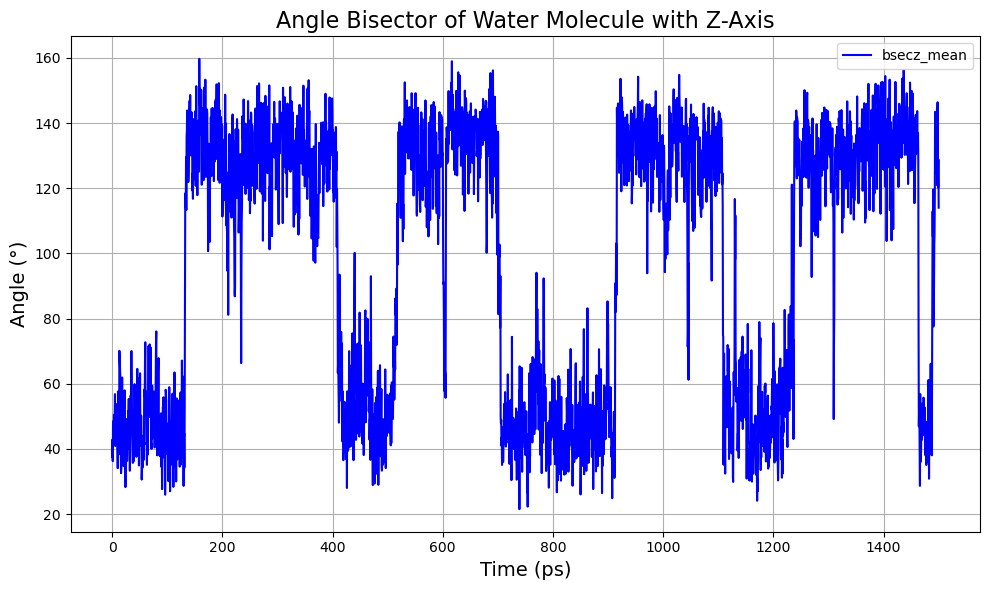

In [119]:
# 定义时间间隔
time_interval = 0.5  # ps
# 计算时间
times = df_output["Frame"] * time_interval

# 绘制曲线图
plt.figure(figsize=(10, 6))
plt.plot(times, df_output["bsecz_mean"], label="bsecz_mean", color="blue")
plt.xlabel("Time (ps)", fontsize=14)
plt.ylabel("Angle (°)", fontsize=14)
plt.title("Angle Bisector of Water Molecule with Z-Axis", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
df_output["orent_prob"]

0       1.000000
1       1.000000
2       1.000000
3       0.857143
4       1.000000
          ...   
2996    1.000000
2997    1.000000
2998    0.833333
2999    0.833333
3000    0.666667
Name: orent_prob, Length: 3001, dtype: float64

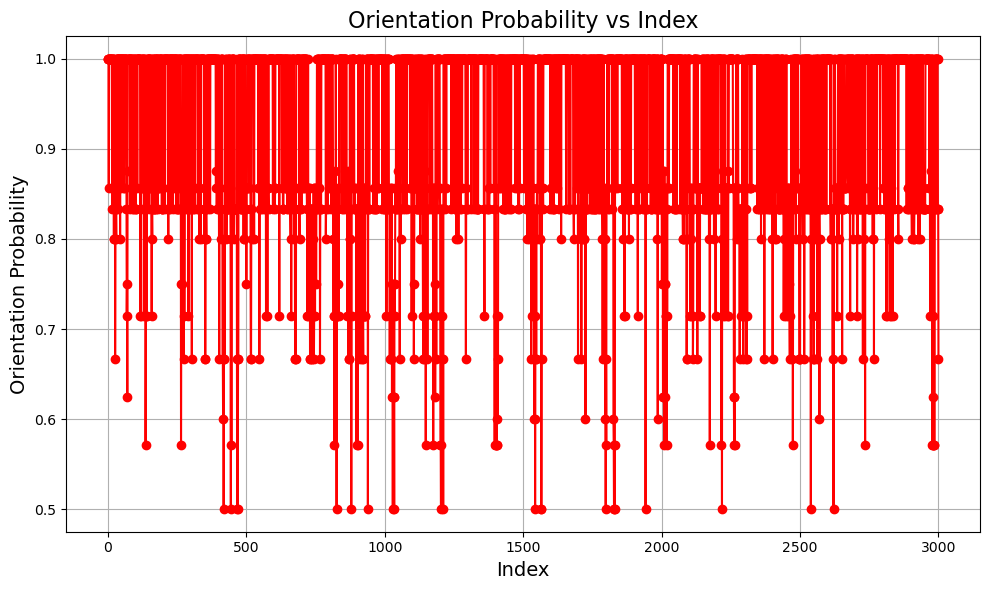

In [127]:
import matplotlib.pyplot as plt


# 绘制曲线图
plt.figure(figsize=(10, 6))
plt.plot(df_output.index, df_output["orent_prob"], marker='o', linestyle='-', color="red")
plt.xlabel("Index", fontsize=14)
plt.ylabel("Orientation Probability", fontsize=14)
plt.title("Orientation Probability vs Index", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_65516/3326488252.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y*100) for y in y_ticks])


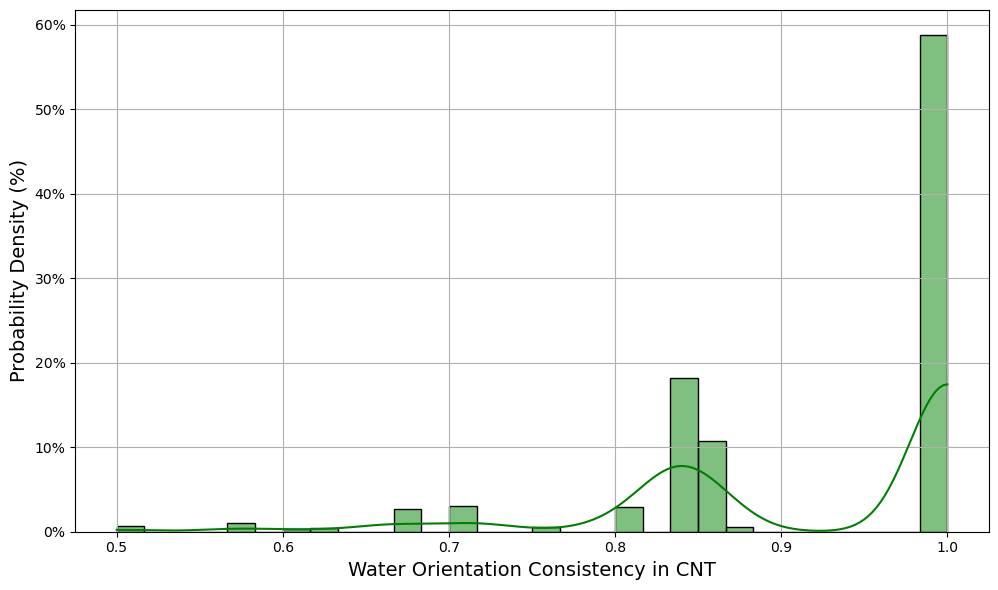

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# 从CSV文件中读取数据
df_output = pd.read_csv('bisector_angles.csv')

# 绘制概率分布图
plt.figure(figsize=(10, 6))
sns.histplot(df_output["orent_prob"], kde=True, bins=30, color="green", stat="probability")

# 设置坐标轴标签和其他属性
plt.xlabel("Water Orientation Consistency in CNT", fontsize=14)
plt.ylabel("Probability Density (%)", fontsize=14)
plt.grid(True)
plt.tight_layout()

# 归一化纵坐标为概率百分比
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}%'.format(y*100) for y in y_ticks])

plt.show()


In [141]:
!pwd

/home/jxhe/works/dp-cnt/cnt-dpmd-data/work_plat


In [208]:
df_output = pd.read_csv('bisector_angles.csv')

In [209]:
df_output

,Frame,Number_in_CNT,bsecz1,bsecz2,bsecz3,bsecz4,bsecz5,bsecz6,bsecz7,bsecz8,bsecz9,bsecz_mean,Orient_Prob,hohang_mean,bond_mean
0,0,7,49.521119,50.312852,13.139977,25.058090,37.362000,54.658794,32.435668,NaN,NaN,37.498357,1.000000,104.270685,0.979967
1,1,6,73.816348,46.412939,12.673328,12.604403,70.643967,41.026836,NaN,NaN,NaN,42.862970,1.000000,101.577885,0.971578
2,2,6,27.651399,35.921954,12.966483,34.113850,64.278064,42.435804,NaN,NaN,NaN,36.227926,1.000000,104.316737,0.973140
3,3,7,46.072401,20.918442,9.408282,36.029417,92.730074,60.073565,74.011720,NaN,NaN,48.463414,0.857143,103.385217,0.981591
4,4,6,48.631165,42.655867,24.270993,34.442027,65.159430,61.408916,NaN,NaN,NaN,46.094733,1.000000,107.415651,0.967902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2996,5,115.921598,149.261003,171.335803,172.735258,122.477045,NaN,NaN,NaN,NaN,146.346141,1.000000,101.917828,0.976185
2997,2997,6,142.560778,131.294261,156.525073,102.844621,134.388893,97.164321,NaN,NaN,NaN,127.462991,1.000000,102.940191,0.981916
2998,2998,6,133.389878,152.758253,116.153595,111.134011,120.145741,87.650028,NaN,NaN,NaN,120.205251,0.833333,106.321566,0.970061
2999,2999,6,117.990794,167.951729,135.040911,144.842273,130.124483,77.108227,NaN,NaN,NaN,128.843069,0.833333,103.085689,0.977300


/tmp/ipykernel_65516/3740599701.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y*100) for y in y_ticks])


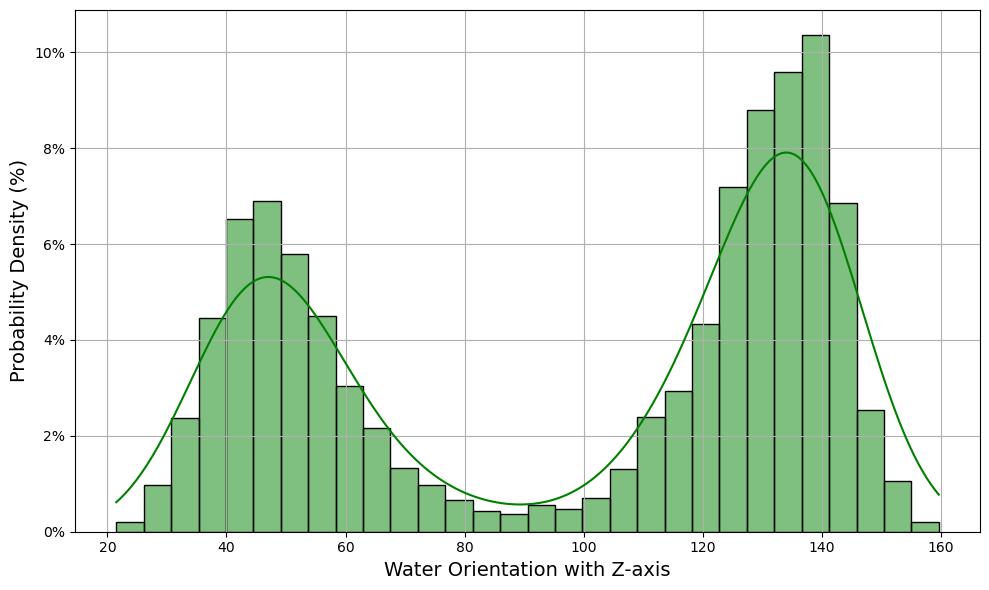

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# 从CSV文件中读取数据
df_output = pd.read_csv('bisector_angles.csv')

# 绘制概率分布图
plt.figure(figsize=(10, 6))
sns.histplot(df_output["bsecz_mean"], kde=True, bins=30, color="green", stat="probability")

# 设置坐标轴标签和其他属性
plt.xlabel("Water Orientation with Z-axis", fontsize=14)
plt.ylabel("Probability Density (%)", fontsize=14)
plt.grid(True)
plt.tight_layout()

# 归一化纵坐标为概率百分比
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}%'.format(y*100) for y in y_ticks])

plt.show()


In [146]:
u.trajectory

<XTCReader /home/jxhe/works/dp-cnt/cnt-dpmd-data/6-6-6-300/nopbc.xtc with 3001 frames of 6009 atoms>

In [147]:
import numpy as np

# 1. 计算CNT内所有水分子氧原子之间的距离
def calculate_oxygen_distances(water_molecules):
    distances = []
    for i in range(len(water_molecules)):
        for j in range(i+1, len(water_molecules)):
            dist = np.linalg.norm(np.array(water_molecules[i][3]) - np.array(water_molecules[j][3]))
            distances.append(dist)
    return distances

# 2. 对于每对相邻的水分子，计算O-O-H的夹角
def calculate_OOH_angle(water_molecules):
    angles = []
    for i in range(len(water_molecules)):
        for j in range(i+1, len(water_molecules)):
            O1 = np.array(water_molecules[i][3])
            O2 = np.array(water_molecules[j][3])
            H1 = np.array(water_molecules[i][4])
            H2 = np.array(water_molecules[j][5])
            
            # 计算O1-O2和O1-H1之间的夹角
            v1 = O2 - O1
            v2 = H1 - O1
            cosine_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
            angle = np.arccos(cosine_angle)
            angles.append(np.degrees(angle))
            
            # 计算O2-O1和O2-H2之间的夹角
            v1 = O1 - O2
            v2 = H2 - O2
            cosine_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
            angle = np.arccos(cosine_angle)
            angles.append(np.degrees(angle))
    return angles

# 使用上述函数
water_molecules = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
distances = calculate_oxygen_distances(water_molecules)
angles = calculate_OOH_angle(water_molecules)

print("O-O Distances:", distances)
print("O-O-H Angles:", angles)


O-O Distances: [1.3234230830664018, 7.4325432841174575, 5.980600134641364, 11.645383004451062, 9.299274490097517, 14.672111851440334, 6.109120201051056, 4.657177051574962, 10.32195992138466, 7.975851407031115, 13.348688768373933, 1.4519431494760937, 4.212839720333605, 1.8667312059800594, 7.239568567322877, 5.664782869809699, 3.318674355456153, 8.69151171679897, 2.3461085143535456, 3.026728846989272, 5.3728373613428175]
O-O-H Angles: [0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 180.0, 0.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 0.0, 180.0, 180.0, 0.0, 0.0, 180.0, 0.0, 180.0]


In [163]:
import numpy as np
import pandas as pd

# Define the CNT atoms
cnt_c_atoms = u.select_atoms('resname CNT and name C')

# Calculate the mean z-coordinate for the CNT atoms
z_mean = cnt_c_atoms.positions[:,2].mean()
cnt_up_h_atoms = u.select_atoms(f'resname CNT and name H and prop z > {z_mean}')
cnt_down_h_atoms= u.select_atoms(f'resname CNT and name H and prop z <= {z_mean}')
z_mean_up = cnt_up_h_atoms.positions[:,2].mean()
z_mean_down = cnt_down_h_atoms.positions[:,2].mean()
cnt_length = z_mean_up - z_mean_down-1.2

cylinder_radius = 6  # Assuming a default value

def get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length):
    ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")
    water_molecules = []
    for oxygen in ow_inside_cylinder:
        if oxygen.index in df_water["OT"].values:
            water_info = df_water[df_water["OT"] == oxygen.index].iloc[0].tolist()
            ot_coords = oxygen.position.tolist()
            ht1_coords = u.atoms[int(water_info[1])].position.tolist()
            ht2_coords = u.atoms[int(water_info[2])].position.tolist()
            water_info.extend([ot_coords, ht1_coords, ht2_coords])
            water_molecules.append(water_info)
    return water_molecules

def calculate_oxygen_distances(water_molecules, threshold=3.5):
    distances = []
    for i in range(len(water_molecules)):
        for j in range(i+1, len(water_molecules)):
            dist = np.linalg.norm(np.array(water_molecules[i][3]) - np.array(water_molecules[j][3]))
            if dist <= threshold:
                distances.append(dist)
    return distances

def calculate_OOH_angle(water_molecules, threshold=3.5):
    angles = []
    for i in range(len(water_molecules)):
        for j in range(i+1, len(water_molecules)):
            O1 = np.array(water_molecules[i][3])
            O2 = np.array(water_molecules[j][3])
            H1 = np.array(water_molecules[i][4])
            
            dist = np.linalg.norm(O1 - O2)
            if dist <= threshold:
                v1 = O2 - O1
                v2 = H1 - O1
                cosine_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
                angle = np.arccos(cosine_angle)
                angles.append(np.degrees(angle))
    return angles

# 遍历每一帧
results = []
for ts in u.trajectory:
    water_molecules = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
    distances = calculate_oxygen_distances(water_molecules)
    angles = calculate_OOH_angle(water_molecules)
    results.append({"Frame": ts.frame, "O-O Distances": distances, "O-O-H Angles": angles})

# 保存为dataframe
df_results = pd.DataFrame(results)
print(df_results)


      Frame                                      O-O Distances  \
0         0  [1.3234230830664018, 1.4519431494760937, 1.866...   
1         1  [1.4519431494760937, 1.8667312059800594, 3.318...   
2         2  [1.4519431494760937, 1.8667312059800594, 3.318...   
3         3  [1.4519431494760937, 1.8667312059800594, 3.318...   
4         4  [1.4519431494760937, 1.8667312059800594, 3.318...   
...     ...                                                ...   
2996   2996  [1.0191168597800555, 0.4342511460206424, 1.453...   
2997   2997  [1.0191168597800555, 0.4342511460206424, 2.954...   
2998   2998  [1.0191168597800555, 0.4342511460206424, 2.954...   
2999   2999  [1.0191168597800555, 0.4342511460206424, 2.954...   
3000   3000  [1.0191168597800555, 0.4342511460206424, 2.954...   

                                        O-O-H Angles  
0                 [0.0, 180.0, 0.0, 0.0, 180.0, 0.0]  
1                      [180.0, 0.0, 0.0, 180.0, 0.0]  
2                      [180.0, 0.0, 0.0, 1

In [165]:
for i in range(0,11):
    print(len(df_results["O-O Distances"][i]))

6
5
5
8
5
5
5
5
5
5
5


In [162]:
df_results["O-O Distances"][3]

[1.4519431494760937,
 1.8667312059800594,
 3.318674355456153,
 0.4633959206083773,
 2.3461085143535456,
 3.026728846989272,
 2.809504434961923,
 2.5633329263808946]

In [166]:
import numpy as np
import pandas as pd

def get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length):
    ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")
    water_molecules = []
    for oxygen in ow_inside_cylinder:
        if oxygen.index in df_water["OT"].values:
            water_info = df_water[df_water["OT"] == oxygen.index].iloc[0].tolist()
            ot_coords = oxygen.position.tolist()
            ht1_coords = u.atoms[int(water_info[1])].position.tolist()
            ht2_coords = u.atoms[int(water_info[2])].position.tolist()
            water_info.extend([ot_coords, ht1_coords, ht2_coords])
            water_molecules.append(water_info)
    return water_molecules

def analyze_water_interactions(water_molecules, threshold=3.5):
    interactions = []
    for i in range(len(water_molecules)):
        for j in range(i+1, len(water_molecules)):
            O1 = np.array(water_molecules[i][3])
            O2 = np.array(water_molecules[j][3])
            H1 = np.array(water_molecules[i][4])
            
            dist = np.linalg.norm(O1 - O2)
            if dist <= threshold:
                v1 = O2 - O1
                v2 = H1 - O1
                cosine_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
                angle = np.arccos(cosine_angle)
                
                interactions.append({
                    "Time": ts.time,
                    "Donor atom ID": water_molecules[i][0],
                    "Acceptor atom ID": water_molecules[j][0],
                    "Donor molecule ID": water_molecules[i][0],
                    "Acceptor molecule ID": water_molecules[j][0],
                    "Distance between oxygens": dist,
                    "Delta distance": dist - threshold,
                    "angle OOH": np.degrees(angle),
                    "Donor molecule x": O1[0],
                    "Donor molecule y": O1[1],
                    "Donor molecule z": O1[2],
                    "Acceptor molecule x": O2[0],
                    "Acceptor molecule y": O2[1],
                    "Acceptor molecule z": O2[2]
                })
    return interactions

results = []
for ts in u.trajectory:
    water_molecules = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
    interactions = analyze_water_interactions(water_molecules)
    results.extend(interactions)

df_results = pd.DataFrame(results)
print(df_results)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [167]:
import numpy as np
import pandas as pd
from MDAnalysis.lib import distances

def extract_water_data(u):
    oxygens = u.select_atoms("type OT")
    water_data = []

    for oxygen in oxygens:
        near_h_sel = u.select_atoms(f"type HT and around 1.1 index {oxygen.index}")
        if len(near_h_sel) == 2:
            hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
            
            # 计算键长
            OH1_length = distances.calc_bonds(oxygen.position, near_h_sel[0].position)
            OH2_length = distances.calc_bonds(oxygen.position, near_h_sel[1].position)
            
            # 计算键角 HT1-OT-HT2，并转换为度
            angle_rad = distances.calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
            angle_deg = np.degrees(angle_rad)
            
            # 找到与当前氧原子相邻的所有氧原子
            near_o_sel = u.select_atoms(f"type OT and around 3.5 index {oxygen.index} and not index {oxygen.index}")
            for near_o in near_o_sel:
                OO_length = distances.calc_bonds(oxygen.position, near_o.position)
                angle_OOH_rad = distances.calc_angles(oxygen.position, near_o.position, near_h_sel[0].position)
                angle_OOH_deg = np.degrees(angle_OOH_rad)
                water_data.append([oxygen.index, near_o.index, OO_length, angle_OOH_deg])
            
            ow_hw_data = [oxygen.index] + hw_indices_pair + [angle_deg, OH1_length, OH2_length]
            water_data.append(ow_hw_data)

    # 创建DataFrame
    index = [f"SOL{i+1}" for i in range(len(water_data))]
    columns = ["OT", "HT1", "HT2", "Angle", "OH1", "OH2"]
    df_water = pd.DataFrame(water_data, index=index, columns=columns)
    return df_water

def get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length):
    ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")
    water_molecules = []
    for oxygen in ow_inside_cylinder:
        if oxygen.index in df_water["OT"].values:
            water_info = df_water[df_water["OT"] == oxygen.index].iloc[0].tolist()
            ot_coords = oxygen.position.tolist()
            ht1_coords = u.atoms[int(water_info[1])].position.tolist()
            ht2_coords = u.atoms[int(water_info[2])].position.tolist()
            water_info.extend([ot_coords, ht1_coords, ht2_coords])
            water_molecules.append(water_info)
    return water_molecules


In [ ]:
判断氢键

In [175]:
import numpy as np
import pandas as pd
from MDAnalysis.lib import distances

def extract_water_data(u):
    oxygens = u.select_atoms("type OT")
    water_data = []

    for oxygen in oxygens:
        near_h_sel = u.select_atoms(f"type HT and around 1.1 index {oxygen.index}")
        if len(near_h_sel) == 2:
            hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
            
            # 计算键长
            OH1_length = distances.calc_bonds(oxygen.position, near_h_sel[0].position)
            OH2_length = distances.calc_bonds(oxygen.position, near_h_sel[1].position)
            
            # 计算键角 HT1-OT-HT2，并转换为度
            angle_rad = distances.calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
            angle_deg = np.degrees(angle_rad)
            
            ow_hw_data = [oxygen.index] + hw_indices_pair + [angle_deg, OH1_length, OH2_length]
            water_data.append(ow_hw_data)

    # 创建DataFrame
    index = [f"SOL{i+1}" for i in range(len(water_data))]
    columns = ["OT", "HT1", "HT2", "Angle", "OH1", "OH2"]
    df_water = pd.DataFrame(water_data, index=index, columns=columns)
    return df_water

def get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length):
    ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")
    water_molecules = []
    for oxygen in ow_inside_cylinder:
        if oxygen.index in df_water["OT"].values:
            water_info = df_water[df_water["OT"] == oxygen.index].iloc[0].tolist()
            ot_coords = oxygen.position.tolist()
            ht1_coords = u.atoms[int(water_info[1])].position.tolist()
            ht2_coords = u.atoms[int(water_info[2])].position.tolist()
            water_info.extend([ot_coords, ht1_coords, ht2_coords])
            water_molecules.append(water_info)
    return water_molecules

def get_hydrogen_bonds(u, water_molecules):
    hbonds_data = []
    for i, water_i in enumerate(water_molecules):
        O_i = u.atoms[int(water_i[0])]
        for j, water_j in enumerate(water_molecules):
            if i != j:
                O_j = u.atoms[int(water_j[0])]
                OO_distance = distances.calc_bonds(O_i.position, O_j.position)
                if 0 < OO_distance <= 3.5:
                    H1_j = u.atoms[int(water_j[1])]
                    H2_j = u.atoms[int(water_j[2])]
                    angle1 = distances.calc_angles(O_i.position, O_j.position, H1_j.position)
                    angle2 = distances.calc_angles(O_i.position, O_j.position, H2_j.position)
                    if np.degrees(angle1) <= 30 or np.degrees(angle2) <= 30:
                        hbonds_data.append({
                            "Donor atom ID": O_i.index,
                            "Acceptor atom ID": O_j.index,
                            "Donor molecule ID": i,
                            "Acceptor molecule ID": j,
                            "Distance between oxygens": OO_distance,
                            "angle OOH": np.degrees(angle1 if np.degrees(angle1) <= 30 else angle2),
                            "Donor molecule x": O_i.position[0],
                            "Donor molecule y": O_i.position[1],
                            "Donor molecule z": O_i.position[2],
                            "Acceptor molecule x": O_j.position[0],
                            "Acceptor molecule y": O_j.position[1],
                            "Acceptor molecule z": O_j.position[2]
                        })
    return hbonds_data


def analyze_trajectory(u, cylinder_radius, cnt_length):
    all_hbonds_data = []
    for ts in u.trajectory[0:11]:
        df_water = extract_water_data(u)
        water_molecules = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
        hbonds_data = get_hydrogen_bonds(u, water_molecules)
        
        for hbond in hbonds_data:
            hbond["Time"] = ts.time
            all_hbonds_data.append(hbond)

    df_hbonds = pd.DataFrame(all_hbonds_data)
    # 计算Delta distance
    df_hbonds["Delta distance"] = df_hbonds.groupby(["Donor atom ID", "Acceptor atom ID"])["Distance between oxygens"].diff().fillna(0)
    return df_hbonds

# 使用方法
# u = ...  # MDAnalysis的Universe对象
# cylinder_radius = ...  # 碳纳米管的半径
# cnt_length = ...  # 碳纳米管的长度
# df_hbonds = analyze_trajectory(u, cylinder_radius, cnt_length)


In [176]:
# Define the CNT atoms
cnt_c_atoms = u.select_atoms('resname CNT and name C')

# Calculate the mean z-coordinate for the CNT atoms
z_mean = cnt_c_atoms.positions[:,2].mean()
cnt_up_h_atoms = u.select_atoms(f'resname CNT and name H and prop z > {z_mean}')
cnt_down_h_atoms= u.select_atoms(f'resname CNT and name H and prop z <= {z_mean}')
z_mean_up = cnt_up_h_atoms.positions[:,2].mean()
z_mean_down = cnt_down_h_atoms.positions[:,2].mean()
cnt_length = z_mean_up - z_mean_down-1.2

cylinder_radius = 6  # Assuming a default value
df_hbonds = analyze_trajectory(u, cylinder_radius, cnt_length)

In [177]:
df_hbonds

,Donor atom ID,Acceptor atom ID,Donor molecule ID,Acceptor molecule ID,Distance between oxygens,angle OOH,Donor molecule x,Donor molecule y,Donor molecule z,Acceptor molecule x,Acceptor molecule y,Acceptor molecule z,Time,Delta distance
0,391,644,1,3,2.711364,19.513187,19.690001,18.500002,18.920000,18.260000,18.750002,16.630001,0.0,0.000000
1,483,391,2,1,2.771154,3.032347,19.190002,20.330000,20.940001,19.690001,18.500002,18.920000,0.0,0.000000
2,644,196,3,0,2.804943,8.126135,18.260000,18.750002,16.630001,20.440002,20.280001,15.750000,0.0,0.000000
3,809,483,4,2,2.794457,8.869785,18.750002,18.600002,23.090000,19.190002,20.330000,20.940001,0.0,0.000000
4,1709,1723,5,6,2.777373,21.979651,19.780001,20.080002,27.990000,19.470001,20.070002,25.230000,0.0,0.000000
5,1723,809,6,4,2.694234,9.061057,19.470001,20.070002,25.230000,18.750002,18.600002,23.090000,0.0,0.000000
6,391,644,0,2,2.541751,5.595181,20.240002,18.390001,17.940001,18.540001,18.580000,16.060001,1.0,-0.169613
7,483,391,1,0,3.011943,12.540276,19.340002,20.320000,20.070002,20.240002,18.390001,17.940001,1.0,0.240789
8,809,483,3,1,2.998349,18.272392,19.050001,18.660000,22.550001,19.340002,20.320000,20.070002,1.0,0.203892
9,1709,1723,4,5,2.926038,12.265956,20.570002,19.550001,28.040001,20.230000,19.360001,25.140001,1.0,0.148665


In [178]:
import numpy as np
import pandas as pd
from MDAnalysis.lib import distances

def extract_water_data(u):
    oxygens = u.select_atoms("type OT")
    water_data = []

    for oxygen in oxygens:
        near_h_sel = u.select_atoms(f"type HT and around 1.1 index {oxygen.index}")
        if len(near_h_sel) == 2:
            hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
            
            # 计算键长
            OH1_length = distances.calc_bonds(oxygen.position, near_h_sel[0].position)
            OH2_length = distances.calc_bonds(oxygen.position, near_h_sel[1].position)
            
            # 计算键角 HT1-OT-HT2，并转换为度
            angle_rad = distances.calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
            angle_deg = np.degrees(angle_rad)
            
            ow_hw_data = [oxygen.index] + hw_indices_pair + [angle_deg, OH1_length, OH2_length]
            water_data.append(ow_hw_data)

    # 创建DataFrame
    index = [f"SOL{i+1}" for i in range(len(water_data))]
    columns = ["OT", "HT1", "HT2", "Angle", "OH1", "OH2"]
    df_water = pd.DataFrame(water_data, index=index, columns=columns)
    return df_water

def get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length):
    ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")
    water_molecules = []
    for oxygen in ow_inside_cylinder:
        if oxygen.index in df_water["OT"].values:
            water_info = df_water[df_water["OT"] == oxygen.index].iloc[0].tolist()
            ot_coords = oxygen.position.tolist()
            ht1_coords = u.atoms[int(water_info[1])].position.tolist()
            ht2_coords = u.atoms[int(water_info[2])].position.tolist()
            water_info.extend([ot_coords, ht1_coords, ht2_coords])
            water_molecules.append(water_info)
    return water_molecules

def get_hydrogen_bonds(u, water_molecules):
    hbonds_data = []
    for i, water_i in enumerate(water_molecules):
        O_i = u.atoms[int(water_i[0])]
        for j, water_j in enumerate(water_molecules):
            if i != j:
                O_j = u.atoms[int(water_j[0])]
                OO_distance = distances.calc_bonds(O_i.position, O_j.position)
                if 0 < OO_distance <= 3.5:
                    H1_j = u.atoms[int(water_j[1])]
                    H2_j = u.atoms[int(water_j[2])]
                    angle1 = distances.calc_angles(O_i.position, O_j.position, H1_j.position)
                    angle2 = distances.calc_angles(O_i.position, O_j.position, H2_j.position)
                    if np.degrees(angle1) <= 30 or np.degrees(angle2) <= 30:
                        hbonds_data.append({
                            "Donor atom ID": O_i.index,
                            "Acceptor atom ID": O_j.index,
                            "Donor molecule ID": i,
                            "Acceptor molecule ID": j,
                            "Distance between oxygens": OO_distance,
                            "angle OOH": np.degrees(angle1 if np.degrees(angle1) <= 30 else angle2),
                            "Donor molecule x": O_i.position[0],
                            "Donor molecule y": O_i.position[1],
                            "Donor molecule z": O_i.position[2],
                            "Acceptor molecule x": O_j.position[0],
                            "Acceptor molecule y": O_j.position[1],
                            "Acceptor molecule z": O_j.position[2]
                        })
    return hbonds_data


def analyze_trajectory(u, cylinder_radius, cnt_length):
    all_hbonds_data = []
    for ts in u.trajectory[0:1000]:
        df_water = extract_water_data(u)
        water_molecules = get_water_inside_CNT(u, df_water, cylinder_radius, cnt_length)
        hbonds_data = get_hydrogen_bonds(u, water_molecules)
        
        for hbond in hbonds_data:
            hbond["Time"] = ts.time
            all_hbonds_data.append(hbond)

    df_hbonds = pd.DataFrame(all_hbonds_data)
    # 计算Delta distance
    df_hbonds["Delta distance"] = df_hbonds.groupby(["Donor atom ID", "Acceptor atom ID"])["Distance between oxygens"].diff().fillna(0)
    return df_hbonds

# 使用方法
# u = ...  # MDAnalysis的Universe对象
# cylinder_radius = ...  # 碳纳米管的半径
# cnt_length = ...  # 碳纳米管的长度
# df_hbonds = analyze_trajectory(u, cylinder_radius, cnt_length)
# Define the CNT atoms
cnt_c_atoms = u.select_atoms('resname CNT and name C')

# Calculate the mean z-coordinate for the CNT atoms
z_mean = cnt_c_atoms.positions[:,2].mean()
cnt_up_h_atoms = u.select_atoms(f'resname CNT and name H and prop z > {z_mean}')
cnt_down_h_atoms= u.select_atoms(f'resname CNT and name H and prop z <= {z_mean}')
z_mean_up = cnt_up_h_atoms.positions[:,2].mean()
z_mean_down = cnt_down_h_atoms.positions[:,2].mean()
cnt_length = z_mean_up - z_mean_down-1.2

cylinder_radius = 6  # Assuming a default value
df_hbonds = analyze_trajectory(u, cylinder_radius, cnt_length)

KeyboardInterrupt: 

In [179]:
from MDAnalysis.lib import distances

def extract_water_data(u, oxygens, htype):
    water_data = []
    for oxygen in oxygens:
        near_h_sel = u.select_atoms(f"type {htype} and around 1.1 index {oxygen.index}")
        if len(near_h_sel) == 2:
            hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
            OH_lengths = distances.calc_bonds([oxygen.position, oxygen.position], near_h_sel.positions)
            angle_rad = distances.calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
            ow_hw_data = [oxygen.index] + hw_indices_pair + [np.degrees(angle_rad), OH_lengths[0], OH_lengths[1]]
            water_data.append(ow_hw_data)
    return pd.DataFrame(water_data, columns=["OT", "HT1", "HT2", "Angle", "OH1", "OH2"])

def get_water_inside_CNT(ow_inside_cylinder, df_water, u):
    water_molecules = []
    for oxygen in ow_inside_cylinder:
        if oxygen.index in df_water["OT"].values:
            water_info = df_water[df_water["OT"] == oxygen.index].iloc[0].tolist()
            ot_coords = oxygen.position.tolist()
            ht1_coords = u.atoms[int(water_info[1])].position.tolist()
            ht2_coords = u.atoms[int(water_info[2])].position.tolist()
            water_info.extend([ot_coords, ht1_coords, ht2_coords])
            water_molecules.append(water_info)
    return water_molecules

def get_hydrogen_bonds(u, water_molecules):
    hbonds_data = []
    water_molecule_positions = np.array([wm[:3] for wm in water_molecules])
    distances_matrix = distances.distance_array(water_molecule_positions[:, 0], water_molecule_positions[:, 0])

    for i, (O_i_idx, H1_i_idx, H2_i_idx, *_rest) in enumerate(water_molecules):
        O_i = u.atoms[O_i_idx]
        for j, (O_j_idx, H1_j_idx, H2_j_idx, *_rest) in enumerate(water_molecules):
            if i != j and 0 < distances_matrix[i, j] <= 3.5:
                H1_j = u.atoms[H1_j_idx]
                H2_j = u.atoms[H2_j_idx]
                angle1 = distances.calc_angles(O_i.position, u.atoms[O_j_idx].position, H1_j.position)
                angle2 = distances.calc_angles(O_i.position, u.atoms[O_j_idx].position, H2_j.position)
                if np.degrees(angle1) <= 30 or np.degrees(angle2) <= 30:
                    hbonds_data.append({
                        "Donor atom ID": O_i_idx,
                        "Acceptor atom ID": O_j_idx,
                        "Donor molecule ID": i,
                        "Acceptor molecule ID": j,
                        "Distance between oxygens": distances_matrix[i, j],
                        "angle OOH": np.degrees(angle1 if np.degrees(angle1) <= 30 else angle2),
                        "Donor molecule x": O_i.position[0],
                        "Donor molecule y": O_i.position[1],
                        "Donor molecule z": O_i.position[2],
                        "Acceptor molecule x": u.atoms[O_j_idx].position[0],
                        "Acceptor molecule y": u.atoms[O_j_idx].position[1],
                        "Acceptor molecule z": u.atoms[O_j_idx].position[2]
                    })
    return hbonds_data

def analyze_trajectory(u, cylinder_radius, cnt_length):
    all_hbonds_data = []
    oxygens = u.select_atoms("type OT")
    htype = "HT"
    ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")

    for ts in u.trajectory[0:1000]:
        df_water = extract_water_data(u, oxygens, htype)
        water_molecules = get_water_inside_CNT(ow_inside_cylinder, df_water, u)
        hbonds_data = get_hydrogen_bonds(u, water_molecules)
        
        for hbond in hbonds_data:
            hbond["Time"] = ts.time
            all_hbonds_data.append(hbond)

    df_hbonds = pd.DataFrame(all_hbonds_data)
    df_hbonds["Delta distance"] = df_hbonds.groupby(["Donor atom ID", "Acceptor atom ID"])["Distance between oxygens"].diff().fillna(0)
    return df_hbonds

# 使用方法
# u = ...  # MDAnalysis的Universe对象
# cylinder_radius = ...  # 碳纳米管的半径
# cnt_length = ...  # 碳纳米管的长度
# df_hbonds = analyze_trajectory(u, cylinder_radius, cnt_length)
cnt_c_atoms = u.select_atoms('resname CNT and name C')

# Calculate the mean z-coordinate for the CNT atoms
z_mean = cnt_c_atoms.positions[:,2].mean()
cnt_up_h_atoms = u.select_atoms(f'resname CNT and name H and prop z > {z_mean}')
cnt_down_h_atoms= u.select_atoms(f'resname CNT and name H and prop z <= {z_mean}')
z_mean_up = cnt_up_h_atoms.positions[:,2].mean()
z_mean_down = cnt_down_h_atoms.positions[:,2].mean()
cnt_length = z_mean_up - z_mean_down-1.2

cylinder_radius = 6  # Assuming a default value
df_hbonds = analyze_trajectory(u, cylinder_radius, cnt_length)

TypeError: calc_bonds(): Parameter 'coords1' must be a numpy.ndarray or an AtomGroup, got <class 'list'>.

In [205]:
def extract_water_data(u, oxygens, htype):
    water_data = []
    for oxygen in oxygens:
        near_h_sel = u.select_atoms(f"type {htype} and around 1.1 index {oxygen.index}")
        if len(near_h_sel) == 2:
            hw_indices_pair = [near_h_sel[0].index, near_h_sel[1].index]
            # Convert positions to numpy arrays
            O_positions = np.array([oxygen.position, oxygen.position])
            OH_lengths = distances.calc_bonds(O_positions, near_h_sel.positions)
            angle_rad = distances.calc_angles(near_h_sel[0].position, oxygen.position, near_h_sel[1].position)
            ow_hw_data = [oxygen.index] + hw_indices_pair + [np.degrees(angle_rad), OH_lengths[0], OH_lengths[1]]
            water_data.append(ow_hw_data)
    return pd.DataFrame(water_data, columns=["OT", "HT1", "HT2", "Angle", "OH1", "OH2"])
def get_water_inside_CNT(ow_inside_cylinder, df_water, u):
    water_molecules = []
    for oxygen in ow_inside_cylinder:
        if oxygen.index in df_water["OT"].values:
            water_info = df_water[df_water["OT"] == oxygen.index].iloc[0].tolist()
            ot_coords = oxygen.position.tolist()
            ht1_coords = u.atoms[int(water_info[1])].position.tolist()
            ht2_coords = u.atoms[int(water_info[2])].position.tolist()
            water_info.extend([ot_coords, ht1_coords, ht2_coords])
            water_molecules.append(water_info)
    return water_molecules
def get_hydrogen_bonds(u, water_molecules):
    hbonds_data = []
    water_molecule_positions = np.array([wm[6] for wm in water_molecules])  # Get the oxygen positions
    distances_matrix = distances.distance_array(water_molecule_positions, water_molecule_positions)
    
    for i, (O_i_idx, H1_i_idx, H2_i_idx, *_rest) in enumerate(water_molecules):
        O_i = u.atoms[int(O_i_idx)]
        for j, (O_j_idx, H1_j_idx, H2_j_idx, *_rest) in enumerate(water_molecules):
            if i != j and 0 < distances_matrix[i, j] <= 3.5:
                H1_j = u.atoms[int(H1_j_idx)]
                H2_j = u.atoms[int(H2_j_idx)]
                angle1 = distances.calc_angles(O_i.position, u.atoms[int(O_j_idx)].position, H1_j.position)
                angle2 = distances.calc_angles(O_i.position, u.atoms[int(O_j_idx)].position, H2_j.position)
                if np.degrees(angle1) <= 30 or np.degrees(angle2) <= 30:
                    hbonds_data.append({
                        "Donor atom ID": O_i_idx,
                        "Acceptor atom ID": O_j_idx,
                        "Donor molecule ID": i,
                        "Acceptor molecule ID": j,
                        "Distance between oxygens": distances_matrix[i, j],
                        "angle OOH": np.degrees(angle1 if np.degrees(angle1) <= 30 else angle2),
                        "Donor molecule x": O_i.position[0],
                        "Donor molecule y": O_i.position[1],
                        "Donor molecule z": O_i.position[2],
                        "Acceptor molecule x": u.atoms[int(O_j_idx)].position[0],
                        "Acceptor molecule y": u.atoms[int(O_j_idx)].position[1],
                        "Acceptor molecule z": u.atoms[int(O_j_idx)].position[2]
                    })
    return hbonds_data
def analyze_trajectory(u, cylinder_radius, cnt_length):
    all_hbonds_data = []
    oxygens = u.select_atoms("type OT")
    htype = "HT"
    ow_inside_cylinder = u.select_atoms(f"type OT and cyzone {cylinder_radius} {cnt_length/2} {-cnt_length/2} resname CNT")

    for ts in u.trajectory[0:5]:
        df_water = extract_water_data(u, oxygens, htype)
        water_molecules = get_water_inside_CNT(ow_inside_cylinder, df_water, u)
        hbonds_data = get_hydrogen_bonds(u, water_molecules)
        
        for hbond in hbonds_data:
            hbond["Time"] = ts.time
            all_hbonds_data.append(hbond)

    df_hbonds = pd.DataFrame(all_hbonds_data)
    df_hbonds["Delta distance"] = df_hbonds.groupby(["Donor atom ID", "Acceptor atom ID"])["Distance between oxygens"].diff().fillna(0)
    return df_hbonds

In [206]:
df_hbonds = analyze_trajectory(u, cylinder_radius, cnt_length)

In [207]:
df_hbonds

,Donor atom ID,Acceptor atom ID,Donor molecule ID,Acceptor molecule ID,Distance between oxygens,angle OOH,Donor molecule x,Donor molecule y,Donor molecule z,Acceptor molecule x,Acceptor molecule y,Acceptor molecule z,Time,Delta distance
0,391.0,644.0,1,3,2.711364,19.513187,19.690001,18.500002,18.920000,18.260000,18.750002,16.630001,0.0,0.000000
1,483.0,391.0,2,1,2.771154,3.032347,19.190002,20.330000,20.940001,19.690001,18.500002,18.920000,0.0,0.000000
2,644.0,196.0,3,0,2.804943,8.126135,18.260000,18.750002,16.630001,20.440002,20.280001,15.750000,0.0,0.000000
3,809.0,483.0,4,2,2.794457,8.869785,18.750002,18.600002,23.090000,19.190002,20.330000,20.940001,0.0,0.000000
4,1709.0,1723.0,5,6,2.777373,21.979651,19.780001,20.080002,27.990000,19.470001,20.070002,25.230000,0.0,0.000000
5,1723.0,809.0,6,4,2.694234,9.061057,19.470001,20.070002,25.230000,18.750002,18.600002,23.090000,0.0,0.000000
6,391.0,644.0,1,3,2.541751,5.595181,20.240002,18.390001,17.940001,18.540001,18.580000,16.060001,1.0,-0.169613
7,483.0,391.0,2,1,3.011943,12.540276,19.340002,20.320000,20.070002,20.240002,18.390001,17.940001,1.0,0.240789
8,644.0,196.0,3,0,2.781709,17.335569,18.540001,18.580000,16.060001,19.810001,20.750000,14.870001,1.0,-0.023235
9,809.0,483.0,4,2,2.998349,18.272392,19.050001,18.660000,22.550001,19.340002,20.320000,20.070002,1.0,0.203892


In [212]:
cnt_c_atoms = u.select_atoms('resname CNT and name C')

# Calculate the mean z-coordinate for the CNT atoms
z_mean = cnt_c_atoms.positions[:,2].mean()
cnt_up_h_atoms = u.select_atoms(f'resname CNT and name H and prop z > {z_mean}')
cnt_down_h_atoms= u.select_atoms(f'resname CNT and name H and prop z <= {z_mean}')
z_mean_up = cnt_up_h_atoms.positions[:,2].mean()
z_mean_down = cnt_down_h_atoms.positions[:,2].mean()
cnt_length = z_mean_up - z_mean_down-1.2

In [221]:
print(cnt_length/2)
print("up:",z_mean_up-0.6)
print("down:",z_mean_down+0.6)

6.534167194366455
up: 28.623333358764647
down: 15.554998970031738


radius 6
len/2 6.534

In [218]:
print("x:",u.dimensions[0]/2)
print("y:",u.dimensions[1]/2)
print("z:",u.dimensions[2])


x: 19.589752197265625
y: 19.5654239654541
z: 44.758907


In [ ]:
resname SOL and (x-19.58975)^2+(y-19.56542)^2< 6^2 and z>15.554 and z<28.623